In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy.io import loadmat
import copy
import matplotlib.lines as mlines
from matplotlib.patches import Rectangle
from scipy.stats import ttest_ind
from matplotlib.colors import LogNorm
from matplotlib.patches import ConnectionPatch

In [ ]:
# Upload data

white_adap1 = loadmat('results_white_adap_eq1.mat')
white_adap2 = loadmat('results_white_adap_eq2.mat')
white_adap3 = loadmat('results_white_adap_eq3.mat')
white_adap4 = loadmat('results_white_adap_eq4.mat')
white_adap5 = loadmat('results_white_adap_eq5.mat')
white_adap6 = loadmat('results_white_adap_eq6.mat')

white_params1 = loadmat('results_white_adap_params_1.mat')
white_params2 = loadmat('results_white_adap_params_2.mat')
white_params3 = loadmat('results_white_adap_params_3.mat')
white_params4 = loadmat('results_white_adap_params_4.mat')
white_params5 = loadmat('results_white_adap_params_5.mat')
white_params6 = loadmat('results_white_adap_params_6.mat')
white_params7 = loadmat('results_white_adap_params_7.mat')
white_params8 = loadmat('results_white_adap_params_8.mat')
white_params9 = loadmat('results_white_adap_params_9.mat')
white_params10 = loadmat('results_white_adap_params_10.mat')
white_params11 = loadmat('results_white_adap_params_11.mat')
white_params12 = loadmat('results_white_adap_params_12.mat')

In [2]:
# Build data structures

list_matrices = ['DurMatrix','DurMixMatrix','PercMatrix','WTAmatrix','CVmatrix']
list_sd       = ['DurSDmatrix','DurMixSDmatrix','PercSDmatrix','WTAsdMatrix','CVsdMatrix']
new_keys      = ['DomDur','MixDur','PercTime','DomIndex','CV']

main_keys     = ['Eq1','Eq2','Eq3','Eq4','Eq5','Eq6']
for j in range(1,13):
    main_keys.append('Params'+str(j))

def transform_data(old_dicts):
    data = {}
    sd_data = {}
    for i in range(0,len(main_keys)):
      old_dict = old_dicts[i]

      var = {new_keys[j]: old_dict[list_matrices[j]] for j in range(0,5)}
      data[main_keys[i]] = var

      var = {new_keys[j]: old_dict[list_sd[j]] for j in range(0,5)}
      sd_data[main_keys[i]] = var
    return data, sd_data

def make_heatmap(experiment):
    heat = copy.deepcopy(experiment)
    for case,value in experiment.items():
        for metric in value:
            heat[case][metric] = np.flipud(experiment[case][metric])
    return heat

data,sd_data = transform_data([white_adap1,white_adap2,white_adap3,white_adap4,white_adap5,white_adap6,
                               white_params1,white_params2,white_params3,white_params4,white_params5,white_params6,
                               white_params7,white_params8,white_params9,white_params10,white_params11,white_params12])
heat         = make_heatmap(data)
heat_sd      = make_heatmap(sd_data)

In [41]:
# Supplementary Figure 1

def plot_heatmap_eqs(data,metric,vmin,vmax,title,size_titles,size_labels,size_pad,save):
    
    fig = plt.figure()
    fig.set_size_inches(35,20)
    gs = fig.add_gridspec(2,4,width_ratios=[1,1,1,0.05])
    
    ax1 = fig.add_subplot(gs[0,0])
    ax2 = fig.add_subplot(gs[0,1])
    ax3 = fig.add_subplot(gs[0,2])
    ax4 = fig.add_subplot(gs[1,0])
    ax5 = fig.add_subplot(gs[1,1])
    ax6 = fig.add_subplot(gs[1,2])
    ax7 = fig.add_subplot(gs[:,-1])

    # define data
    heat1 = data['Eq1'][metric]
    heat2 = data['Eq2'][metric]
    heat3 = data['Eq3'][metric]
    heat4 = data['Eq4'][metric]
    heat5 = data['Eq5'][metric]
    heat6 = data['Eq6'][metric]
    # heatmaps
    sns.heatmap(heat1,ax=ax1,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),
                 xticklabels=[],square=True,cbar=None)
    sns.heatmap(heat3,ax=ax2,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),
                 xticklabels=[],square=True,cbar=None,yticklabels=[])
    sns.heatmap(heat2,ax=ax3,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),
                 xticklabels=[],square=True,cbar=None,yticklabels=[])
    sns.heatmap(heat4,ax=ax4,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),
                 square=True,cbar=None)
    sns.heatmap(heat5,ax=ax5,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),
                 square=True,cbar=None,yticklabels=[])
    sns.heatmap(heat6,ax=ax6,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),
                 square=True,yticklabels=[],cbar_ax=ax7)
    # color bar configurations
    cbar = ax6.collections[0].colorbar
    cbar.set_ticks(np.arange(vmin,vmax+1,0.5*(vmax-vmin)))
    cbar.set_ticklabels(np.arange(vmin,vmax+1,0.5*(vmax-vmin)))
    cbar.ax.tick_params(labelsize=size_labels,length=10,width=2)
    # y axis configurations
    cbar.ax.set_ylabel(title,fontsize=size_labels)
    for ax in [ax1,ax4]:
        ax.set_ylabel(r'Input Contrast, c',fontsize=size_labels,labelpad=-25)
        ax.set_yticks([0,50])
        ax.set_yticklabels([1,0.02],fontsize=size_labels)
        ax.tick_params(axis='y', rotation=0, pad = 10,length=10,width=2)
    # x axis parameters
    for ax in [ax4,ax5,ax6]:
        ax.set_xlabel(r'Noise Intensity, $\sigma$',fontsize=size_labels,labelpad=0)
        ax.set_xticks([0,50])
        ax.set_xticklabels([0.005,0.25],fontsize=size_labels,fontdict={'ha':'left'})
        ax.tick_params(axis='x', rotation=0,length=10,width=2)
    #titles
    titles = ['Formulation 1','Formulation 2','Formulation 3','Formulation 4','Formulation 5','Formulation 6']
    axes = [ax1,ax2,ax3,ax4,ax5,ax6]
    for ax,t in zip(axes,titles):
        ax.set_title(t,{'fontsize':size_titles,'fontweight':'normal'},pad=size_pad)
    if save:
        plt.savefig(save+'.pdf',bbox_inches='tight')
    plt.show()
    return fig

title = 'Dominance Time (%)'
size_titles = 38
size_labels = 38
size_pad = 15
ax1 = plot_heatmap_eqs(heat,'PercTime',0,100,title,size_titles,size_labels,size_pad,'sup1_eqs')

In [6]:
means = np.array([data['Params'+str(i)]['PercTime'].mean() for i in range(1,13)])
means = means.reshape(4,3)
means = np.flipud(means)
maxs = np.array([data['Params'+str(i)]['PercTime'].max() for i in range(1,13)])
maxs = maxs.reshape(4,3)
maxs = np.flipud(maxs)

In [56]:
# Supplementary Figure 1




def plot_heatmap_params(mean_matrix,vmin,vmax,size_labels,size_pad,save):  
    fig = plt.figure()
    fig.set_size_inches(21,10)
    gs = fig.add_gridspec(5,6,width_ratios=[0.2,0.6,0.2,0.1,0.8,0.05],height_ratios=[0.05,0.05,0.1,0.8,0.1])
    ax1 = fig.add_subplot(gs[2:,0:3])
    ax2 = fig.add_subplot(gs[3,4])
    ax3 = fig.add_subplot(gs[0,1])
    ax4 = fig.add_subplot(gs[3,5])
    
    # matrix of means
    sns.heatmap(mean_matrix,ax=ax1,vmin=vmin,vmax=vmax,cmap=sns.color_palette("Blues"),square=True,norm=LogNorm(),
                cbar_ax=ax3,cbar_kws={'orientation':'horizontal','shrink':0.5,'anchor':(0,0)})    

    cbar = ax1.collections[0].colorbar
    cbar.set_ticks([0.01,0.1,1,10])
    cbar.ax.tick_params(labelsize=size_labels,length=10,width=2)
    cbar.ax.set_xlabel(r'Mean Dominance Time (%)',fontsize=size_labels,labelpad=-100)
    ax1.set_ylabel(r'Input Contrast, c',fontsize=size_labels,labelpad=size_pad)
    ax1.set_yticks([0,1,2,3,4])
    ax1.set_yticklabels([1,0.75,0.5,0.25,0],fontsize=size_labels)
    ax1.set_xlabel(r'Noise Intensity, $\sigma$',fontsize=size_labels,labelpad=size_pad)
    ax1.set_xticks([0,1,2,3])
    ax1.set_xticklabels([0,0.05,0.1,0.25],fontsize=size_labels)
    ax1.tick_params('both',rotation=0,pad=10,length=10,width=2)
    
    sns.heatmap(data['Params3']['PercTime'],ax=ax2,vmin=0,vmax=100,cmap=sns.color_palette("Blues"),
                square=True,cbar_ax=ax4)
    
    cbar = ax2.collections[0].colorbar
    cbar.set_ticks(np.arange(vmin,vmax+1,0.5*(vmax-vmin)))
    cbar.set_ticklabels(np.arange(vmin,vmax+1,0.5*(vmax-vmin)))
    cbar.ax.tick_params(labelsize=size_labels-4,length=10,width=2)
    cbar.ax.set_ylabel(r'Dominance Time (%)',fontsize=size_labels-4)
    ax2.set_ylabel(r'Adaptation Weight, $w_H$',fontsize=size_labels,labelpad=-10)
    ax2.set_yticks([0,50])
    ax2.set_yticklabels([5,0.1],fontsize=size_labels)
    ax2.set_xlabel(r'Adaptation Time Constant, $\tau_H$',fontsize=size_labels,labelpad=size_pad)
    ax2.set_xticks([0,50])
    ax2.set_xticklabels([100,5000],fontsize=size_labels,fontdict={'ha':'left'})
    ax2.tick_params('both',rotation=0,pad=10,length=10,width=2)
    
    
    lil_box = Rectangle((2, 3), 0.99, 0.99,alpha=0.6,ec='tab:red',lw=3,fill=False)
    ax1.add_patch(lil_box)
    
    con1 = ConnectionPatch(xyA=(3, 3), xyB=(0, 0), coordsA='data', coordsB='data',
                          axesA=ax1, axesB=ax2,arrowstyle="-",lw=3,ec='tab:red',alpha=0.6)
    con2 = ConnectionPatch(xyA=(3, 4), xyB=(0, 50), coordsA='data', coordsB='data',
                          axesA=ax1, axesB=ax2,arrowstyle="-",lw=3,ec='tab:red',alpha=0.6)
    ax1.add_artist(con1)
    ax1.add_artist(con2)
        
    lil_box = Rectangle((19, 19), 1, 1,alpha=1,ec='tab:red',lw=2,fill=False)
    ax2.add_patch(lil_box)
    
    
    
    if save:
        plt.savefig(save+'.pdf',bbox_inches='tight')
    plt.show()
    return fig

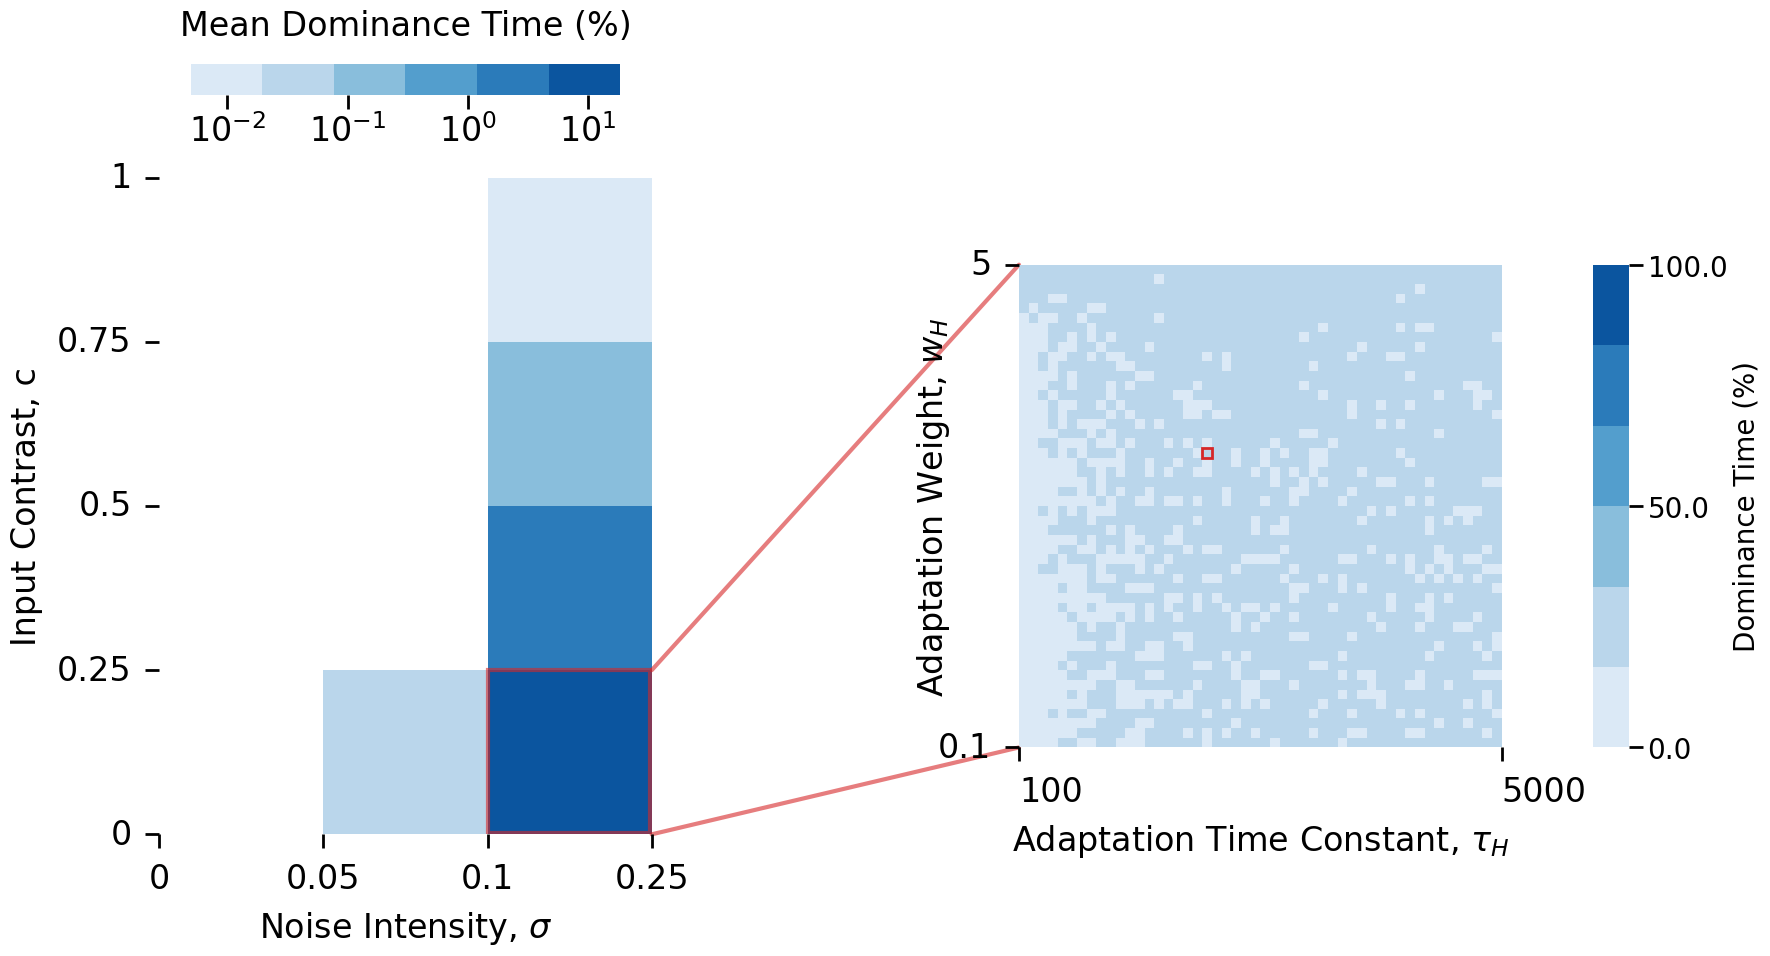

In [57]:
size_labels = 24
size_pad = 10
ax = plot_heatmap_params(means,0,100,size_labels,size_pad,'sup2_params')